# 🧪 Fraud Detection - Exploratory Data Analysis (EDA)
This notebook performs an exploratory analysis of the credit card transactions dataset to better understand patterns related to fraudulent transactions.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the credit card transaction dataset
df = pd.read_csv('../data/creditcard.csv')

# This section loads the dataset and provides an overview, including shape, column names, and the first few rows
# The goal is to verify that the dataset has loaded properly and to become familiar with its structure
print("Shape of dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())

# First few rows
df.head()


Shape of dataset: (284807, 31)

Column names: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Class
0    284315
1       492
Name: count, dtype: int64
Fraudulent transactions make up 0.1727% of the data.


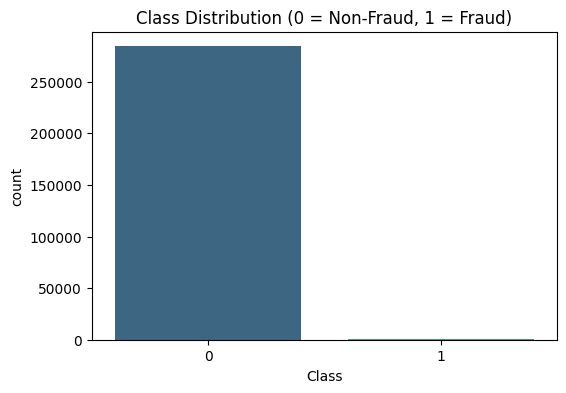

In [3]:
# Check class distribution
# This step analyzes the distribution of the target variable (Class)
# We examine how many transactions are labeled as fraudulent (Class=1) vs non-fraudulent (Class=0)
# A bar plot is used to visualize class imbalance - a critical aspect to address before training the ML model
class_counts = df['Class'].value_counts()
print(class_counts)

fraud_pct = class_counts[1] / class_counts.sum() * 100
print(f"Fraudulent transactions make up {fraud_pct:.4f}% of the data.")

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Class', hue='Class', palette='viridis', legend=False)
plt.title('Class Distribution (0 = Non-Fraud, 1 = Fraud)')
plt.show()


In [4]:
# In this step, we generate descriptive statistics and check for missing data
# This section provides basic stats(mean, std, min, max) for all numeric features.
# We also confirm whether there are missing/null values in the dataset.
df.describe()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


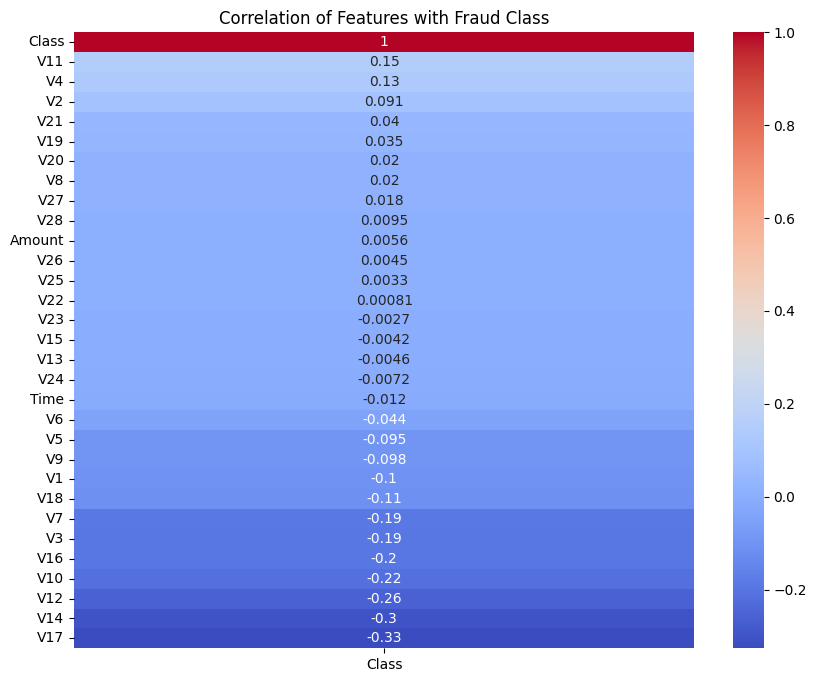

In [5]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix[['Class']].sort_values(by='Class', ascending=False), annot=True, cmap='coolwarm')
plt.title('Correlation of Features with Fraud Class')
plt.show()

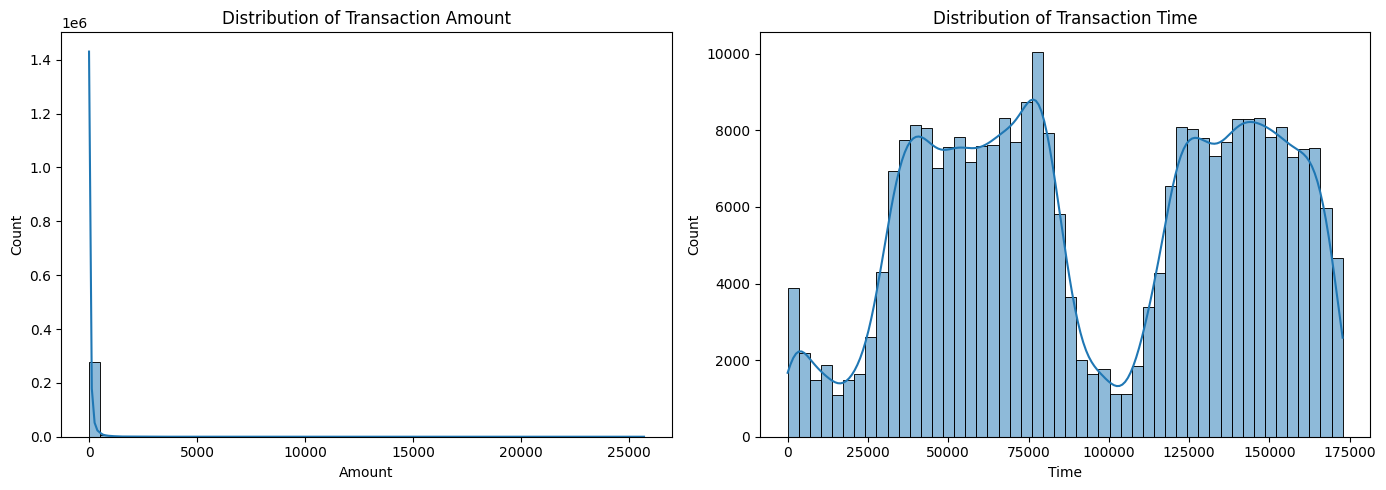

In [6]:
# Visualization of transaction amount distribution for each class
# Added visualization distribution of the 'Time' feature, follows, indicating the number of seconds elapsed between transactions
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(df['Amount'], bins=50, ax=axs[0], kde=True)
axs[0].set_title('Distribution of Transaction Amount')

sns.histplot(df['Time'], bins=50, ax=axs[1], kde=True)
axs[1].set_title('Distribution of Transaction Time')

plt.tight_layout()
plt.show()

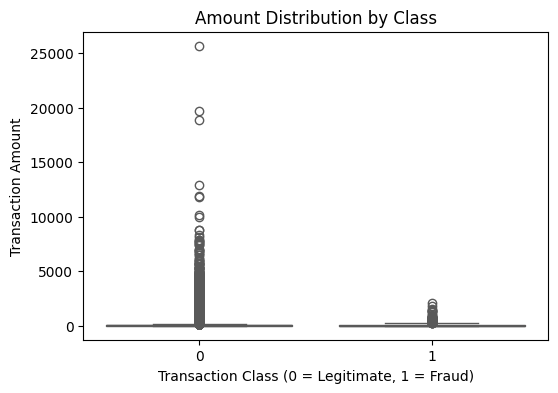

In [12]:
# Plot displays Amount distribution by class enabling comparison between legitimate and fraudulent transactions
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Class', y='Amount', hue='Class', palette='Set2', legend=False)
plt.title('Amount Distribution by Class')
plt.xlabel('Transaction Class (0 = Legitimate, 1 = Fraud)')
plt.ylabel('Transaction Amount')
plt.show()